In [1]:
# ===========
# ENVIRONMENT
# ===========

import fitbit

import pandas as pd
import numpy as np

from datetime import datetime
from fbprophet import Prophet

# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# ===========
# ACQUISITION
# ===========

chunks = fitbit.get_fitbit(files=['2018-04-26_through_2018-05-26.csv',
                           '2018-05-27_through_2018-06-26.csv',
                           '2018-06-27_through_2018-07-27.csv',
                           '2018-07-28_through_2018-08-26.csv',
                           '2018-08-27_through_2018-09-26.csv',
                           '2018-09-27_through_2018-10-27.csv',
                           '2018-10-28_through_2018-11-27.csv',
                           '2018-11-28_through_2018-12-28.csv'])

chunks = fitbit.clean_fitbit(chunks, cols=['Date', 'Calories Burned', 'Steps',
                            'Distance', 'Floors', 'Minutes Sedentary',
                            'Minutes Lightly Active', 'Minutes Fairly Active',
                            'Minutes Very Active', 'Activity Calories'])



# ===========
# PREPARATION
# ===========


df = fitbit.prepare_fitbit(chunks, 8, 'Date')
df.sample(10)

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-10-10,"3,183","8,996",4.24,128.0,683,151.0,18.0,48.0,"1,330"
2018-05-07,"2,524",952,0.45,0.0,907,63.0,0.0,0.0,283
2018-11-08,"4,137","15,542",7.33,26.0,716,238.0,15.0,86.0,"2,436"
2018-06-10,"3,432","7,029",3.32,7.0,728,230.0,35.0,9.0,"1,549"
2018-07-03,"2,144",0,0.00,0.0,"1,440",0.0,0.0,0.0,0
2018-10-11,"4,194","16,811",8.24,18.0,683,216.0,7.0,90.0,"2,398"
2018-05-22,"3,581","4,680",2.21,1.0,625,209.0,33.0,2.0,"1,460"
2018-09-24,"2,771","4,500",2.12,7.0,841,167.0,0.0,0.0,822
2018-06-12,"3,352","4,535",2.14,1.0,"1,224",186.0,20.0,10.0,"1,241"


In [2]:
fitbit.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Calories Burned,0,0.0,0,0.0,0,0.0
Steps,0,0.0,0,0.0,0,0.0
Distance,0,0.0,0,0.0,0,0.0
Floors,0,0.0,0,0.0,0,0.0
Minutes Sedentary,0,0.0,0,0.0,0,0.0
Minutes Lightly Active,0,0.0,0,0.0,0,0.0
Minutes Fairly Active,0,0.0,0,0.0,0,0.0
Minutes Very Active,0,0.0,0,0.0,0,0.0
Activity Calories,0,0.0,0,0.0,0,0.0


In [3]:
df = fitbit.convert_to_float(df, 'Calories Burned', 'Steps', 'Minutes Sedentary', 'Activity Calories')

In [4]:
# ===========
# EXPLORATION
# ===========

fitbit.summarize_data(df)

HEAD
            Calories Burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  A

In [5]:
# fitbit.plot_subs(df,
#              df.select_dtypes(include='number').columns.values)

In [6]:
#fitbit.plot_hist(df,20)

In [7]:
#sns.pairplot(df)

In [8]:
#fitbit.plot_heat(df)

In [9]:
df.tail()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2018-12-02,3957.0,13257.0,6.23,195.0,NaN,265.0,13.0,70.0,2305.0
2018-12-03,3660.0,12915.0,6.12,6.0,NaN,219.0,40.0,51.0,1993.0
2018-12-04,3384.0,13763.0,6.49,13.0,NaN,199.0,11.0,67.0,1663.0
2018-12-05,3670.0,13865.0,6.52,12.0,NaN,200.0,12.0,69.0,1968.0
2018-12-06,3669.0,14774.0,6.96,9.0,NaN,198.0,4.0,78.0,1962.0


In [10]:
df = df.reset_index()
fitbit.convert_to_datetime(df, 'Date')
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
1,2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2,2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
3,2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
4,2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [11]:
# df = df.set_index('Date')
df.head(10)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
1,2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2,2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
3,2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
4,2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0
5,2018-05-01,3292.0,2581.0,1.22,0.0,919.0,167.0,13.0,2.0,1068.0
6,2018-05-02,2660.0,1372.0,0.65,0.0,927.0,90.0,0.0,0.0,419.0
7,2018-05-03,3121.0,2232.0,1.05,0.0,876.0,157.0,16.0,0.0,1006.0
8,2018-05-04,2522.0,904.0,0.43,1.0,1012.0,61.0,0.0,0.0,269.0
9,2018-05-05,2551.0,833.0,0.39,0.0,969.0,68.0,0.0,0.0,326.0


In [12]:
df.columns

Index(['Date', 'Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories'],
      dtype='object')

In [13]:
ddf = df.copy()

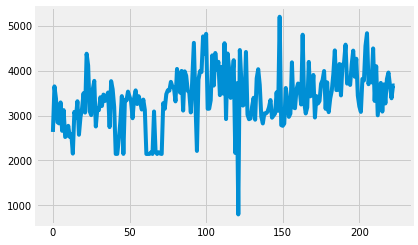

In [14]:
df['Calories Burned'].plot()

In [15]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2018-04-26,2635.0,2931.0,1.38,2.0,1347.0,93.0,0.0,0.0,566.0
1,2018-04-27,3649.0,9971.0,4.70,19.0,1158.0,219.0,46.0,17.0,1752.0
2,2018-04-28,3379.0,3521.0,1.66,2.0,702.0,155.0,22.0,11.0,1124.0
3,2018-04-29,2851.0,1639.0,0.77,0.0,891.0,122.0,0.0,0.0,602.0
4,2018-04-30,2825.0,1323.0,0.62,0.0,880.0,104.0,0.0,0.0,540.0


In [16]:
ddf['y'] = df['Calories Burned']
ddf['ds'] = pd.to_datetime(ddf['Date'])
ddf = ddf.groupby(['ds'])['y'].sum().reset_index()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


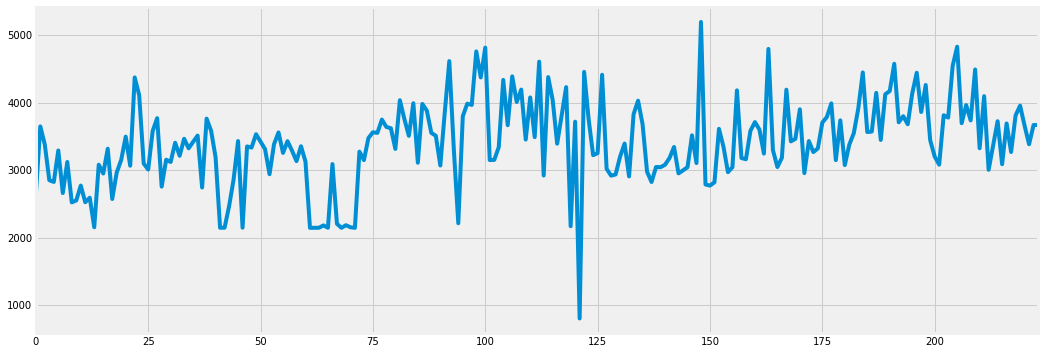

In [17]:
plt.figure(figsize=(16,6))
sns.tsplot(ddf.y)

In [18]:
ddf['cap'] = 6666
ddf['floor'] = 0

m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9)
m.fit(ddf)

future = m.make_future_dataframe(periods=180)
future['cap'] = 6666
future['floor'] = 0
print(future.head())
print(future.tail())
print(ddf.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


          ds   cap  floor
0 2018-04-26  6666      0
1 2018-04-27  6666      0
2 2018-04-28  6666      0
3 2018-04-29  6666      0
4 2018-04-30  6666      0
            ds   cap  floor
399 2019-05-31  6666      0
400 2019-06-01  6666      0
401 2019-06-02  6666      0
402 2019-06-03  6666      0
403 2019-06-04  6666      0
            ds       y   cap  floor
219 2018-12-02  3957.0  6666      0
220 2018-12-03  3660.0  6666      0
221 2018-12-04  3384.0  6666      0
222 2018-12-05  3670.0  6666      0
223 2018-12-06  3669.0  6666      0


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
399,2019-05-31,4525.460088,3764.333714,5279.383477
400,2019-06-01,4617.851202,3872.676043,5348.491292
401,2019-06-02,4611.687441,3859.892586,5360.264912
402,2019-06-03,4303.111167,3563.526418,5028.301469
403,2019-06-04,4364.166378,3611.093922,5088.939655


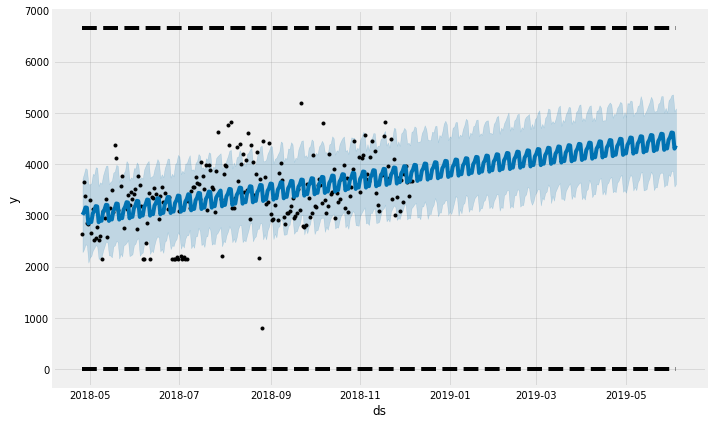

In [20]:
fig1 = m.plot(forecast)

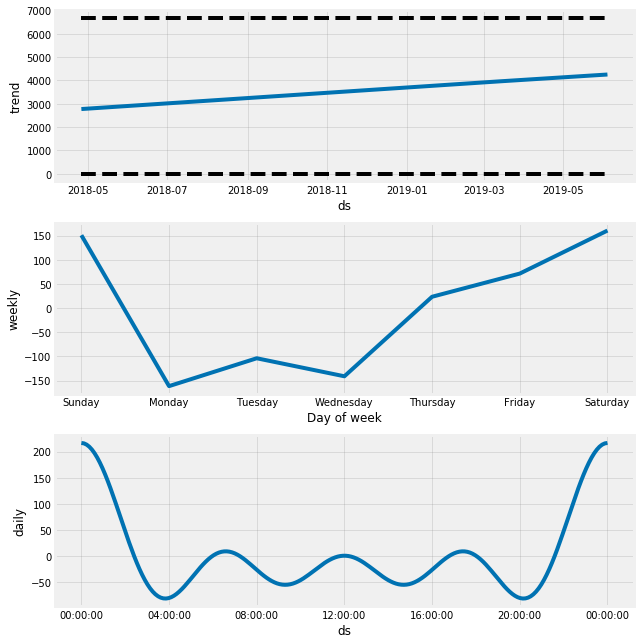

In [21]:
fig2 = m.plot_components(forecast)

In [22]:
df.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,224.000000,224.000000,224.000000,224.000000,153.000000,224.000000,224.000000,224.000000,224.000000
mean,3402.107143,8538.254464,4.047857,12.625000,875.169935,188.022321,14.901786,33.982143,1484.562500
std,633.836137,5267.425883,2.511816,25.897045,260.341395,75.270123,15.395509,37.241903,749.470549
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,3068.250000,4705.500000,2.217500,2.000000,704.000000,157.750000,3.000000,2.000000,1060.750000
50%,3389.000000,7789.000000,3.675000,7.000000,798.000000,202.000000,10.500000,15.000000,1477.000000
75%,3766.750000,12401.750000,5.905000,13.000000,990.000000,235.500000,21.000000,63.250000,1963.500000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000
